<a href="https://colab.research.google.com/github/kiwindow/telakoya/blob/main/Telakoya2_InputOutputPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ■ 日本腎・血液浄化AI学会主催「よくわかる寺子屋セミナー」

# 第2回「データの入出力と前処理」　演習プログラム

## □ 文責　学術委員会副委員長　岩藤和広

◇ 以下の演習では、このnotebookをGoogle Colaboratoryを利用できる必要があります。Telakoya第１回の講義を参照して下さい。

https://www.dropbox.com/s/tr3hpa46hq7thvp/HowtoUseGoogleColaboratory.pdf?dl=0

◆ 以下のプログラムを変更なしに利用するには、次の作業が必要になります。


*   Google Drive にある「マイドライブ」というフォルダーの中に Telakoya というフォルダーを作成する。
*  さらに、Telakoya の中に、data というフォルダーと result というフォルダーを作成する。
*  今使っている notebook を Telakoya というフォルダーの中に保存する。
* また data というフォルダーの中に以下の六つのデータをuploadして保存する。

　　　　data.csv, 　data.xlsx, 　dataM.xlsx, 　columndata.csv, 　columndata.xls, 　columndataM.xlsx

* 上記の六つのファイルは以下のリンクからdownloadできる。

　　　　　https://www.dropbox.com/s/nmpw7pt073aa9f5/Telakoya2Data.zip?dl=0

* データをuploadするには、Colaborary上でフォルダーdataに入り、新規 > ファイルのアップロードから uploadする。


# 1. データの入力 (読み込み)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# numpyとpandasのimport　　  　numpyは数値計算のLibrary   pandasは表計算のLibrary
import numpy as np
import pandas as pd

## 1) csvファイルの読み込み

◆ データをcsvで保存する場合は、必ず「コンマ区切り」にする。

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
# pandasによるcsvファイルの読み込み
df_c = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

◆　 pd.read_csvでエラーが出る時

1.   notebookがGoogle Driveにマウントされていない。(データはGoogle Drive上のデータを読み込むため)
2.   ファイルのパス(directory)の記載にタイプミスがある。　☜　最も多い
3.   パスの指定が 'drive/MyDrive/... で始まっていない。
4.   エラーメッセージで、UnicodeDecodeError: 'utf-8' codec can't decode ... などと出る。　☜ かなり頻繁に起こる　　　　　　　　　　　　　　　　　　　　　　　　　　　➡ pd.read_csv( ... )の最後に、以下のようなoptionを加える。


     df_c = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv, encoding = 'unicode_escape' )







◆　pd.read_csvで文字化けが起こる時  　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　➡ 　pd.read_csv( ... )の最後に、次のようなoptionを加える。


     df_c = pd.red_csv('drive/MyDrive/Telakoya/data/data.csv, encoding = 'shift-jis')

  ➡　それでエラーが出る場合は、cp932を指定してみる。

     df_c = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv, encoding = 'cp932')

◆　Tips & Tricks  ファイルのバス名を簡単に取得する方法

Colabで作業する部分の左にあるカラム(ファイルのtree構造)において、そのファイルの場所をdrive > MyDrive > Telakoya > ... と辿って行き、目的のファイルを右クリック(Macなら二本指クリック)して、「パスをコピー」でコピーして、パスを入力する部分に貼り付ける。

In [ ]:
df_c.shape

(15000, 151)

In [ ]:
df_c.head()
# NaNとは、not a number(非数)という意味で、欠損値を示す。

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
# infoはDataFrameの基本的な情報を表示する
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 17.3+ MB


In [ ]:
# 容量が + MB となっている場合は、memory_usageというoptionの値を 'deep'　にすると、全容量が表示される
df_c.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 66.1 MB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
# describeは各column(説明変数)の数、平均、標準偏差、...などの統計量を表示する
df_c.describe()

,factor4,factor6,factor9,factor10,factor11,factor12,factor15,factor18,factor19,factor20,...,factor134,factor136,factor141,factor142,factor144,factor146,factor147,factor148,factor149,factor150
count,1.254400e+04,12514.000000,12511.000000,12526.000000,12500.000000,12524.000000,12465.000000,12545.000000,12506.000000,12494.000000,...,12628.000000,12489.000000,12491.000000,12517.000000,12440.000000,12530.000000,12547.000000,12510.000000,12480.000000,12401.000000
mean,2.488085e+00,2.507221,2.505893,2.520863,2.489419,2.496008,2.516159,2.497037,2.525902,2.494576,...,2.496966,2.504391,2.512766,2.499413,2.516922,2.503284,2.486547,2.506460,2.495052,2.504067
std,1.431048e+00,1.441092,1.448540,1.450967,1.448868,1.442478,1.458579,1.445208,1.435786,1.432842,...,1.441329,1.450181,1.456648,1.448441,1.438237,1.452780,1.451287,1.445066,1.449894,1.459373
min,1.910715e-07,0.000865,0.000003,0.000056,0.000709,0.000142,0.000172,0.000496,0.000172,0.000002,...,0.000018,0.000127,0.000195,0.000233,0.000073,0.000540,0.000352,0.000625,0.000055,0.000170
25%,1.273875e+00,1.266502,1.236694,1.260030,1.229542,1.233626,1.251759,1.252920,1.298015,1.242821,...,1.239183,1.243464,1.229200,1.232609,1.270294,1.224551,1.214859,1.241506,1.232536,1.235081
50%,2.474292e+00,2.486029,2.501443,2.525176,2.483807,2.498472,2.518660,2.489611,2.534020,2.488015,...,2.498895,2.515233,2.526120,2.492286,2.525108,2.506436,2.479317,2.495833,2.499120,2.499090
75%,3.729182e+00,3.745544,3.772298,3.790788,3.743121,3.744259,3.793889,3.744895,3.769517,3.730720,...,3.738834,3.763128,3.801797,3.758312,3.761003,3.779269,3.753224,3.772277,3.753152,3.797835
max,4.999861e+00,4.999757,4.999873,4.999891,4.999961,4.999339,4.999875,4.999557,4.999828,4.999001,...,4.999544,4.999211,4.998968,4.999930,4.999931,4.999950,4.999496,4.998991,4.999768,4.998911


In [ ]:
# df_cの型を確認
type(df_c)

pandas.core.frame.DataFrame

In [ ]:
# pandas の DataFrame を numpy の array(配列) に変換する
df_c2 = np.array(df_c)
df_c2

array([['ID1', nan, nan, ..., 1.259221302423431, 0.7732870517547132,
        1.0287363490062829],
       ['ID2', 'C', 'Z', ..., 0.2210971394155301, 0.976043833946374,
        2.9835332667906647],
       ['ID3', 'A', 'A', ..., nan, 2.4348970290644747, 4.520744788336513],
       ...,
       ['ID14998', 'A', 'C', ..., 4.859076275035232, 4.93298949898281,
        0.3916589553081202],
       ['ID14999', nan, nan, ..., 1.3145171071184372, 2.407776775332024,
        2.731232887542422],
       ['ID15000', 'A', 'B', ..., 3.9455075723675535, 0.9572876312888434,
        nan]], dtype=object)

In [ ]:
# df_c2の型の確認
type(df_c2)

numpy.ndarray

In [ ]:
# numpy の array(配列)を pandas の DataFrame に変換する
df_c3 = pd.DataFrame(df_c2)
df_c3

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.24388,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.17593,C,4.365006,A,C,1.650896,...,3.17593,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.2863,NaN,4.652309,1.428877,3.36287
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.44539,C,NaN,2.824001,...,0.779132,0.49173,NaN,NaN,Z,2.614576,2.299104,2.843733,4.20113,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


In [ ]:
# df_c3の型を確認
type(df_c3)

pandas.core.frame.DataFrame

## 2) Excelファイルの読み込み

### A. シートが一つの時

In [ ]:
# openpyxlとxlrdの読み込み
!pip install openpyxl
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
# Excelのsheetの読み込み (46sec)
df_e = pd.read_excel('drive/MyDrive/Telakoya/data/data.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_e.shape

(15000, 151)

In [ ]:
df_e.tail()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
14995,ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
14996,ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
14997,ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
14998,ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN
14999,ID15000,Z,3.843689,2.510889,A,0.399757,B,1.232519,1.876001,C,...,A,C,A,C,0.400730,4.093127,NaN,NaN,A,NaN


### B. シートが複数の時

◆ 一つのシートの読み込み

In [ ]:
# sheet_name どのシートを読み込みかを指定。　 (32sec)
# 特定のシートを読み込む時は、0, 1, 2, 3, ...　で指定する。(最初のシートを 0 から数える)
# 複数のシートを持つExcelを、シートの指定なしに読み込むと、Sheet1が読み込まれる。
df_e2 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = 1 )

In [ ]:
df_e2.head()

,ID,factor151,factor152,factor153,factor154,factor155,factor156,factor157,factor158,factor159,...,factor291,factor292,factor293,factor294,factor295,factor296,factor297,factor298,factor299,factor300
0,ID1,NaN,2.464942,NaN,0.007436,Z,3.506274,1.314082,0.247916,1.021672,...,NaN,Z,Z,C,Z,4.869429,NaN,C,4.899439,2.568069
1,ID2,2.401100,0.515284,0.043880,NaN,NaN,1.395273,2.494737,3.660393,1.913122,...,NaN,Z,Z,C,C,2.067848,0.693057,A,0.793015,0.828566
2,ID3,NaN,3.317927,4.119144,3.199708,C,NaN,NaN,4.308041,NaN,...,C,NaN,B,NaN,Z,0.725646,0.462849,C,1.434779,4.021405
3,ID4,4.724536,0.434173,4.969515,0.461601,C,2.382994,2.021569,4.616026,3.155488,...,C,B,B,A,A,3.223171,4.310015,C,1.974843,4.641641
4,ID5,1.267560,0.460766,1.082705,0.783792,A,4.086288,4.849491,NaN,0.330423,...,A,A,B,C,B,3.327713,NaN,B,1.977426,0.375360


In [ ]:
# シートの名前 Sheet1, Sheet2, ... を sheet_name で指定してもよい (30sec)
df_e1 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = 'Sheet1')

In [ ]:
# シート1枚の時のデータのタイプ
type(df_e1)

pandas.core.frame.DataFrame

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.keys.html

In [ ]:
# シートの項目名の確認
df_e1.keys()

Index(['ID', 'factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6',
       'factor7', 'factor8', 'factor9',
       ...
       'factor141', 'factor142', 'factor143', 'factor144', 'factor145',
       'factor146', 'factor147', 'factor148', 'factor149', 'factor150'],
      dtype='object', length=151)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
# 使用したメモリー容量の確認
df_e1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 17.3+ MB


In [ ]:
# 使用したメモリー容量の確認 (17.2+ のように + の印が出る時)
df_e1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 66.1 MB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
# データの統計量の確認
df_e1.describe()

,factor2,factor3,factor5,factor7,factor8,factor10,factor11,factor13,factor16,factor17,...,factor128,factor132,factor133,factor134,factor137,factor138,factor139,factor145,factor146,factor147
count,12479.000000,12540.000000,12597.000000,12528.000000,12481.000000,12479.000000,12513.000000,12495.000000,12530.000000,12607.000000,...,12509.000000,12530.000000,12445.000000,12527.000000,12496.000000,12506.000000,12569.000000,12534.000000,12490.000000,12464.000000
mean,2.507555,2.492139,2.521674,2.504479,2.495181,2.523055,2.493290,2.502460,2.491179,2.484021,...,2.501165,2.491134,2.496794,2.509603,2.492250,2.491975,2.490179,2.507258,2.510838,2.500936
std,1.441746,1.444554,1.444790,1.445896,1.444372,1.451644,1.437224,1.439179,1.444730,1.448899,...,1.435519,1.428462,1.444519,1.441140,1.446791,1.435194,1.440081,1.448021,1.439993,1.440419
min,0.000281,0.000072,0.000484,0.001369,0.000731,0.000171,0.000025,0.000547,0.000596,0.000363,...,0.000304,0.000028,0.000558,0.000592,0.000061,0.000447,0.000158,0.000880,0.000058,0.000109
25%,1.247302,1.245538,1.280708,1.237048,1.246366,1.271320,1.255518,1.263326,1.231624,1.215359,...,1.271007,1.268657,1.246228,1.282643,1.243003,1.246883,1.247322,1.245831,1.269747,1.254364
50%,2.524384,2.493797,2.519669,2.517526,2.510490,2.527083,2.501047,2.498186,2.478844,2.487710,...,2.526900,2.488845,2.504620,2.518349,2.485182,2.503411,2.491443,2.512969,2.508644,2.512624
75%,3.763923,3.748452,3.785665,3.765544,3.746220,3.789381,3.746705,3.743419,3.740739,3.744319,...,3.731049,3.706626,3.743284,3.753403,3.751545,3.729997,3.730881,3.750641,3.763160,3.722054
max,4.999900,4.999275,4.999640,4.998896,4.999958,4.999664,4.999762,4.999801,4.999853,4.999918,...,4.999968,4.998888,4.999025,4.999945,4.999732,4.999664,4.999552,4.999864,4.999947,4.999758


◆ 複数のシートを読み込み

In [ ]:
# 複数のシートを読み込む時は、sheet_name = [0, 1, 4] または sheet_name = [0, 1, 'Sheet4'] などとする (1min)
df_e124 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = [0, 1, "Sheet4"])

In [ ]:
# 複数のシートを読み込んだ場合のデータのタイプ
type(df_e124)

dict

◆ 辞書形式

dict = { 'height' : 173, 'weight' : 63, 'age' : 60 } 

'key' : value の組合せ

In [ ]:
len(df_e124)

3

In [ ]:
# 全てのシートを読み込み時は、sheet_name = Noneとする (1min43sec)
df_eall = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = None)

In [ ]:
len(df_eall)

4

In [ ]:
# 各シートの名称の確認
df_eall.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 全てのシートのメモリー容量の確認
import io
keys = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
bag = []
for i in range(len(df_eall)):
    sheet = df_eall[keys[i]]
    buffer = io.StringIO()
    info = sheet.info(buf = buffer, memory_usage='deep', verbose=False)
    s = buffer.getvalue()
    n = s.find('memory')
    print('Sheet ' + str(i+1) + ' : ' + s[n:-1])
    count = s[-9:-4]
    bag.append(float(count))
sm = 0
for e in bag:
    sm += e
print('Total Memory ' + str(sm) + ' MB')

Sheet 1 : memory usage: 66.1 MB
Sheet 2 : memory usage: 66.1 MB
Sheet 3 : memory usage: 66.1 MB
Sheet 4 : memory usage: 66.1 MB
Total Memory 264.4 MB


In [ ]:
# 読み込んだ複数のシートから特定のシートを取り出す時
sheet3 = df_eall['Sheet3']
sheet3.head()

,ID,factor301,factor302,factor303,factor304,factor305,factor306,factor307,factor308,factor309,...,factor441,factor442,factor443,factor444,factor445,factor446,factor447,factor448,factor449,factor450
0,ID1,1.637469,B,4.807016,NaN,0.362068,C,NaN,1.024884,3.598801,...,Z,NaN,0.431421,2.354051,C,NaN,4.173442,0.530844,NaN,Z
1,ID2,3.004798,Z,1.255367,4.240366,3.098796,C,4.478978,1.139137,0.048258,...,B,B,0.361225,0.854408,C,NaN,3.772249,4.608696,NaN,A
2,ID3,NaN,Z,0.188772,4.443684,3.055271,C,3.386638,1.136162,3.216752,...,Z,Z,2.590638,3.064684,C,NaN,3.356388,3.076952,NaN,C
3,ID4,0.340177,A,2.413153,4.317032,1.846049,NaN,3.579710,NaN,3.838091,...,NaN,C,1.507554,NaN,B,4.662539,3.084195,4.518717,4.317032,NaN
4,ID5,1.965152,A,NaN,2.377202,4.765937,B,NaN,4.897822,4.978828,...,Z,B,2.987345,2.895044,A,NaN,NaN,3.547397,0.227089,C


# 2. データの出力 (保存、書き出し)

## 0) 使用するデータ

In [ ]:
import numpy as np
import pandas as pd

# pandasによるcsvファイルの読み込み 
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
df.shape

(15000, 151)

In [ ]:
df

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,NaN,2.824001,...,0.779132,0.491730,NaN,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 1) csvによる出力

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
# csvでの書き出し (to_csv)
df.to_csv('drive/MyDrive/Telakoya/data/df.csv')

In [ ]:
# csvからの読み込み (read_csv)
sheet = pd.read_csv('drive/MyDrive/Telakoya/data/df.csv')

In [ ]:
sheet.shape

(15000, 152)

In [ ]:
sheet.head()

,Unnamed: 0,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,2,ID3,A,A,C,3.175930,C,4.365006,A,C,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


In [ ]:
# 保存する際にindexを消す場合
df.to_csv('drive/MyDrive/Telakoya/data/df2.csv', index=False)

In [ ]:
sheet2 = pd.read_csv('drive/MyDrive/Telakoya/data/df2.csv')
sheet2.head()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


In [ ]:
sheet2.shape

(15000, 151)

## 2) csvに圧縮して出力

In [ ]:
# 圧縮してcsvで保存 (compression = 'gzip' というオプションをつける)
df.to_csv('drive/MyDrive/Telakoya/data/dfcomp.csv.gz', compression = 'gzip')

In [ ]:
# 圧縮したcsvの読み込み (read_csv)
sheet_comp = pd.read_csv('drive/MyDrive/Telakoya/data/dfcomp.csv.gz')

In [ ]:
sheet_comp.equals(sheet)

True

In [ ]:
# メモリー容量の確認
sheet_comp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 152 entries, Unnamed: 0 to factor150
dtypes: float64(75), int64(1), object(76)
memory usage: 66.2 MB


## 3) Parquetによる出力

In [ ]:
# Parquetのインストール
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/pandas-docs/version/1.1/reference/api/pandas.DataFrame.to_parquet.html

In [ ]:
# Parquetで保存: to_parquet
df.to_parquet('drive/MyDrive/Telakoya/data/df.parquet')

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [ ]:
# Parquetで読み込み: read_parquet
df_parquet = pd.read_parquet('drive/MyDrive/Telakoya/data/df.parquet')
df_parquet

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,None,None,A,NaN,None,1.241863,B,None,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,None,0.464134,Z,2.191147,None,B,4.382401,...,3.137875,4.642228,None,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,None,2.197228,None,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,None,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,None,2.824001,...,0.779132,0.491730,None,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,None,None,Z,NaN,A,4.059424,None,None,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


In [ ]:
df_parquet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 64.4 MB


## 4) Featherによる出力

In [ ]:
# Featherのインストール
!pip install feather-format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_feather.html

In [ ]:
# Featherによる保存
import feather
df.to_feather('drive/MyDrive/Telakoya/data/df.feather')

https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html

In [ ]:
# Featherによる読み込み
df_feather = pd.read_feather('drive/MyDrive/Telakoya/data/df.feather')
df_feather

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,None,None,A,NaN,None,1.241863,B,None,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,None,0.464134,Z,2.191147,None,B,4.382401,...,3.137875,4.642228,None,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,None,2.197228,None,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,None,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,None,2.824001,...,0.779132,0.491730,None,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,None,None,Z,NaN,A,4.059424,None,None,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 5) Pickleによる出力

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html

In [ ]:
# pickleによる保存
import pickle
df.to_pickle('drive/MyDrive/Telakoya/data/df.pkl')

https://pandas.pydata.org/docs/reference/api/pandas.read_pickle.html

In [ ]:
# pickleによる読み込み
df_pkl = pd.read_pickle('drive/MyDrive/Telakoya/data/df.pkl')
df_pkl

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,NaN,2.824001,...,0.779132,0.491730,NaN,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


# 3. 入出力の容量と時間の比較

In [ ]:
import numpy as np
import pandas as pd

### ランダムなデータの作成

In [ ]:
# row-orientedなデータ(matrixR)を作成する関数
import numpy as np
import pandas as pd
collen = 200000
rowlen = 100
matrixR = np.random.rand(collen, rowlen)
print(matrixR.shape)
matrixR = pd.DataFrame(matrixR)
heads = []
for i in range(rowlen):
    heads.append('factor' + str(i))
matrixR.columns = heads

(200000, 100)


In [ ]:
# column-orientedなデータ(matrixC)を作成する関数
import numpy as np
import pandas as pd
collen = 100
rowlen = 200000
matrixC = np.random.rand(collen, rowlen)
print(matrixC.shape)
matrixC = pd.DataFrame(matrixC)
heads = []
for i in range(rowlen):
    heads.append('factor'+str(i))
matrixC.columns = heads

(100, 200000)


In [ ]:
matrixR

,factro0,factro1,factro2,factro3,factro4,factro5,factro6,factro7,factro8,factro9,...,factro90,factro91,factro92,factro93,factro94,factro95,factro96,factro97,factro98,factro99
0,0.566238,0.646237,0.125831,0.491275,0.099583,0.210171,0.623294,0.441683,0.578273,0.251697,...,0.975651,0.843579,0.214950,0.289797,0.578516,0.052421,0.403496,0.005335,0.090367,0.999958
1,0.697063,0.966511,0.310472,0.706197,0.066524,0.971762,0.718931,0.703976,0.679316,0.649832,...,0.062509,0.257621,0.610772,0.967389,0.800982,0.763951,0.378888,0.075581,0.127216,0.318729
2,0.466867,0.442243,0.024299,0.147806,0.159800,0.858981,0.148136,0.713265,0.999858,0.308629,...,0.115985,0.478649,0.928717,0.034082,0.827978,0.460307,0.370954,0.237734,0.855920,0.245258
3,0.517603,0.054936,0.528799,0.535280,0.079153,0.192923,0.050211,0.380124,0.021979,0.301775,...,0.635344,0.278052,0.841059,0.080720,0.940104,0.764242,0.184777,0.209004,0.273470,0.459294
4,0.857932,0.774185,0.700288,0.246234,0.874153,0.270490,0.116003,0.346141,0.498186,0.747076,...,0.364970,0.769345,0.505394,0.760319,0.802100,0.670602,0.857869,0.370016,0.409475,0.183332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.970331,0.885026,0.506244,0.876016,0.030010,0.356864,0.649871,0.353117,0.164757,0.053837,...,0.287108,0.252931,0.013753,0.555053,0.903733,0.563602,0.132770,0.496069,0.427175,0.026899
199996,0.746728,0.369992,0.429811,0.133180,0.670841,0.514266,0.464630,0.793612,0.755250,0.994101,...,0.884735,0.980034,0.823402,0.225744,0.987184,0.765515,0.302218,0.684926,0.966314,0.499827
199997,0.702685,0.334511,0.613268,0.230473,0.207267,0.277152,0.162762,0.834528,0.822816,0.213354,...,0.705183,0.478539,0.373331,0.965420,0.919487,0.677940,0.099614,0.756620,0.200255,0.956528
199998,0.769614,0.515912,0.635687,0.515359,0.619039,0.558552,0.877288,0.048372,0.237955,0.303130,...,0.827545,0.372774,0.922473,0.014415,0.777253,0.093481,0.650393,0.591241,0.986572,0.886106


### A. csvによる入出力

In [ ]:
# 縦に長いデータの出力 (33秒, 368.8MB)
matrixR.to_csv('drive/MyDrive/Telakoya/data/matrixR.csv')

In [ ]:
# 縦に長いデータの入力 (7秒)
pd.read_csv('drive/MyDrive/Telakoya/data/matrixR.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.265615,0.958135,0.098135,0.394743,0.965593,0.312374,0.039446,0.287470,0.772384,...,0.282846,0.841507,0.375385,0.955713,0.691552,0.545281,0.897282,0.696372,0.342553,0.235908
1,1,0.405308,0.496298,0.396892,0.446035,0.909029,0.511065,0.332553,0.900486,0.592501,...,0.369796,0.678608,0.575286,0.689492,0.530373,0.866050,0.162668,0.055963,0.514272,0.953112
2,2,0.463649,0.773873,0.663493,0.665161,0.519899,0.545455,0.550886,0.529915,0.866377,...,0.604631,0.428550,0.300142,0.509099,0.900841,0.860852,0.984941,0.984026,0.476064,0.301137
3,3,0.743172,0.570227,0.662504,0.220324,0.986982,0.342440,0.692879,0.828399,0.501248,...,0.173131,0.909234,0.654403,0.522218,0.621266,0.492129,0.231854,0.100842,0.303236,0.299421
4,4,0.729254,0.524214,0.923482,0.667255,0.207537,0.939517,0.941626,0.875620,0.672155,...,0.280984,0.324398,0.036474,0.083239,0.374876,0.012602,0.825178,0.968908,0.831770,0.940562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0.469457,0.446179,0.611787,0.078686,0.865794,0.682721,0.970881,0.849285,0.573769,...,0.667963,0.702238,0.202625,0.815619,0.708844,0.952578,0.150045,0.008708,0.599443,0.726853
199996,199996,0.565327,0.928328,0.252797,0.201536,0.405649,0.764652,0.323658,0.536079,0.843572,...,0.041902,0.304036,0.555715,0.324268,0.618423,0.053720,0.592546,0.907980,0.375995,0.036282
199997,199997,0.054774,0.398762,0.008515,0.286387,0.831591,0.717436,0.715505,0.444595,0.744691,...,0.544631,0.878702,0.321060,0.523305,0.153038,0.922984,0.965286,0.408048,0.553331,0.494989
199998,199998,0.250339,0.027973,0.927300,0.132458,0.986522,0.078791,0.423128,0.822247,0.126388,...,0.456665,0.306023,0.400886,0.259764,0.222788,0.110060,0.407297,0.385767,0.283690,0.579316


In [ ]:
# 横に長いデータの出力 (1分５秒, 369.9MB)
matrixC.to_csv('drive/MyDrive/Telakoya/data/matrixC.csv')

In [ ]:
# 横に長いデータの入力 (1分19秒)
pd.read_csv('drive/MyDrive/Telakoya/data/matrixC.csv')

,Unnamed: 0,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,...,factor199990,factor199991,factor199992,factor199993,factor199994,factor199995,factor199996,factor199997,factor199998,factor199999
0,0,0.507309,0.202545,0.774882,0.476781,0.153652,0.599185,0.840418,0.004006,0.402768,...,0.298306,0.434592,0.645688,0.626400,0.887649,0.957700,0.063407,0.805687,0.095620,0.772872
1,1,0.954195,0.394055,0.202658,0.163246,0.533597,0.725369,0.416675,0.758235,0.953336,...,0.908475,0.326933,0.297251,0.946789,0.784066,0.206310,0.861717,0.418081,0.189486,0.371726
2,2,0.537115,0.716226,0.968971,0.113609,0.585955,0.017514,0.561385,0.509357,0.570985,...,0.089363,0.990464,0.522822,0.895612,0.715506,0.748628,0.291135,0.249618,0.257010,0.344867
3,3,0.002012,0.712655,0.725019,0.717937,0.065567,0.679609,0.666556,0.822287,0.742833,...,0.342179,0.219452,0.179574,0.462372,0.420210,0.234552,0.372822,0.432404,0.770164,0.631965
4,4,0.129784,0.998120,0.101903,0.360444,0.979016,0.928809,0.848954,0.554962,0.006142,...,0.219520,0.957113,0.964484,0.753920,0.797041,0.920895,0.323305,0.814096,0.930080,0.750118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.160912,0.927679,0.159828,0.877739,0.910931,0.235546,0.451179,0.429805,0.574095,...,0.304083,0.928850,0.851583,0.712747,0.726058,0.149522,0.629438,0.476667,0.508961,0.297263
96,96,0.840230,0.794903,0.787415,0.203710,0.394350,0.852148,0.454251,0.945592,0.897526,...,0.206313,0.453539,0.832102,0.238804,0.418603,0.050213,0.543037,0.079244,0.472996,0.930726
97,97,0.972668,0.928226,0.429303,0.127240,0.805772,0.770234,0.426153,0.696835,0.900145,...,0.816451,0.045506,0.308078,0.436704,0.997124,0.411021,0.187020,0.794169,0.227194,0.597592
98,98,0.426608,0.645172,0.495008,0.330627,0.787035,0.265206,0.096864,0.460010,0.503575,...,0.517003,0.303875,0.837766,0.258138,0.344321,0.679292,0.498946,0.160401,0.193713,0.387153


### B. parquetによる入出力

In [ ]:
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 34.7 MB/s 
     |████████████████████████████████| 140 kB 50.9 MB/s 
     |████████████████████████████████| 1.6 MB 41.3 MB/s 


In [ ]:
# 縦に長いデータの出力 (6秒, 179.3MB)
matrixR.to_parquet('drive/MyDrive/Telakoya/data/matrixR.parquet')

In [ ]:
# 横に長いデータの入力 (1秒)
pd.read_parquet('drive/MyDrive/Telakoya/data/matrixR.parquet')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99
0,0.538163,0.223616,0.158177,0.170010,0.616478,0.646055,0.772121,0.520751,0.938321,0.064196,...,0.003129,0.602737,0.367298,0.414082,0.986527,0.252355,0.609355,0.822070,0.023731,0.651603
1,0.970986,0.300084,0.808698,0.988565,0.989196,0.061762,0.360561,0.510876,0.527009,0.155362,...,0.967611,0.569507,0.125555,0.917175,0.049322,0.650695,0.607822,0.250380,0.401009,0.146947
2,0.801034,0.984318,0.686422,0.958695,0.905111,0.536431,0.569063,0.779703,0.367790,0.281711,...,0.400607,0.101951,0.122227,0.023468,0.746899,0.215168,0.907367,0.683093,0.431803,0.191065
3,0.282203,0.224979,0.023204,0.440112,0.264759,0.891893,0.957168,0.888674,0.133867,0.438846,...,0.703246,0.719821,0.260207,0.158616,0.444022,0.635602,0.790231,0.788017,0.157710,0.304024
4,0.675301,0.011488,0.500971,0.632003,0.896817,0.193746,0.759440,0.163109,0.928124,0.158450,...,0.647509,0.881195,0.551418,0.632055,0.213268,0.368122,0.256379,0.992103,0.135277,0.978032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.322076,0.555584,0.730622,0.587543,0.554630,0.392122,0.075740,0.848766,0.665389,0.516128,...,0.435200,0.272912,0.674519,0.251451,0.737110,0.613106,0.403288,0.307642,0.285012,0.031820
199996,0.461724,0.082239,0.688346,0.051391,0.948575,0.866821,0.839411,0.936805,0.422213,0.669549,...,0.105401,0.569454,0.077075,0.324376,0.925313,0.975775,0.502950,0.951716,0.334409,0.194672
199997,0.106972,0.677717,0.102619,0.197747,0.711659,0.252395,0.902644,0.637795,0.625327,0.755409,...,0.878552,0.634438,0.232555,0.460507,0.046647,0.423029,0.589972,0.502766,0.117721,0.787400
199998,0.369865,0.997988,0.548465,0.346762,0.604310,0.554978,0.783586,0.697374,0.789280,0.126815,...,0.701054,0.643338,0.297623,0.039982,0.279826,0.949016,0.892066,0.578723,0.695910,0.865746


In [ ]:
# 横に長いデータの出力 (35秒, 304.2MB)
matrixC.to_parquet('drive/MyDrive/Telakoya/data/matrixC.parquet')

In [ ]:
# 横に長いデータの入力 (21秒)
pd.read_parquet('drive/MyDrive/Telakoya/data/matrixC.parquet')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor199990,factor199991,factor199992,factor199993,factor199994,factor199995,factor199996,factor199997,factor199998,factor199999
0,0.058284,0.033912,0.767734,0.755024,0.450225,0.288380,0.605059,0.365939,0.583697,0.572506,...,0.219267,0.418649,0.448098,0.908262,0.488040,0.072793,0.526659,0.402383,0.317505,0.362030
1,0.572315,0.265652,0.433990,0.373784,0.620043,0.035665,0.988792,0.283083,0.943204,0.434504,...,0.911151,0.958784,0.661700,0.624505,0.031554,0.057604,0.414228,0.714465,0.078943,0.193517
2,0.459437,0.855215,0.882455,0.488943,0.557547,0.219526,0.530435,0.082749,0.532763,0.629837,...,0.145940,0.929987,0.579876,0.199184,0.228524,0.471120,0.244924,0.519480,0.842339,0.759454
3,0.565600,0.690000,0.395167,0.802580,0.034135,0.533012,0.542539,0.268640,0.151296,0.274536,...,0.877020,0.543901,0.001209,0.154706,0.190261,0.020045,0.525512,0.643355,0.127988,0.433380
4,0.651622,0.095173,0.021378,0.489140,0.000557,0.406072,0.442052,0.857224,0.001349,0.841988,...,0.765404,0.313549,0.313449,0.687882,0.240486,0.453304,0.135391,0.141879,0.042640,0.741132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.436162,0.101717,0.277777,0.759085,0.217187,0.329695,0.485280,0.303061,0.367050,0.802581,...,0.476819,0.885093,0.906349,0.901047,0.349587,0.171045,0.325070,0.758699,0.761274,0.543752
96,0.470241,0.215251,0.338399,0.907157,0.299807,0.041526,0.314554,0.469832,0.968486,0.772215,...,0.996527,0.595940,0.726266,0.564434,0.555867,0.860727,0.881046,0.754305,0.347686,0.599251
97,0.850630,0.003683,0.394460,0.802417,0.787744,0.353979,0.154761,0.949129,0.737419,0.262938,...,0.366874,0.199102,0.354407,0.165370,0.320686,0.893419,0.162674,0.341233,0.688699,0.656864
98,0.144424,0.307101,0.903077,0.954074,0.859366,0.015158,0.696523,0.863378,0.843036,0.285308,...,0.353239,0.628163,0.866048,0.543362,0.899559,0.103736,0.667301,0.726793,0.782176,0.319902


### C. featherによる入出力

In [ ]:
!pip install feather-format
import feather

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 縦に長いデータの出力 (3秒, 152.7MB)
matrixR.to_feather('drive/MyDrive/Telakoya/data/matrixR.feather')

In [ ]:
# 縦に長いデータの入力 (1秒)
pd.read_feather('drive/MyDrive/Telakoya/data/matrixR.feather')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99
0,0.538163,0.223616,0.158177,0.170010,0.616478,0.646055,0.772121,0.520751,0.938321,0.064196,...,0.003129,0.602737,0.367298,0.414082,0.986527,0.252355,0.609355,0.822070,0.023731,0.651603
1,0.970986,0.300084,0.808698,0.988565,0.989196,0.061762,0.360561,0.510876,0.527009,0.155362,...,0.967611,0.569507,0.125555,0.917175,0.049322,0.650695,0.607822,0.250380,0.401009,0.146947
2,0.801034,0.984318,0.686422,0.958695,0.905111,0.536431,0.569063,0.779703,0.367790,0.281711,...,0.400607,0.101951,0.122227,0.023468,0.746899,0.215168,0.907367,0.683093,0.431803,0.191065
3,0.282203,0.224979,0.023204,0.440112,0.264759,0.891893,0.957168,0.888674,0.133867,0.438846,...,0.703246,0.719821,0.260207,0.158616,0.444022,0.635602,0.790231,0.788017,0.157710,0.304024
4,0.675301,0.011488,0.500971,0.632003,0.896817,0.193746,0.759440,0.163109,0.928124,0.158450,...,0.647509,0.881195,0.551418,0.632055,0.213268,0.368122,0.256379,0.992103,0.135277,0.978032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.322076,0.555584,0.730622,0.587543,0.554630,0.392122,0.075740,0.848766,0.665389,0.516128,...,0.435200,0.272912,0.674519,0.251451,0.737110,0.613106,0.403288,0.307642,0.285012,0.031820
199996,0.461724,0.082239,0.688346,0.051391,0.948575,0.866821,0.839411,0.936805,0.422213,0.669549,...,0.105401,0.569454,0.077075,0.324376,0.925313,0.975775,0.502950,0.951716,0.334409,0.194672
199997,0.106972,0.677717,0.102619,0.197747,0.711659,0.252395,0.902644,0.637795,0.625327,0.755409,...,0.878552,0.634438,0.232555,0.460507,0.046647,0.423029,0.589972,0.502766,0.117721,0.787400
199998,0.369865,0.997988,0.548465,0.346762,0.604310,0.554978,0.783586,0.697374,0.789280,0.126815,...,0.701054,0.643338,0.297623,0.039982,0.279826,0.949016,0.892066,0.578723,0.695910,0.865746


In [ ]:
# 横に長いデータの出力 (12秒, 234.2MB)
matrixC.to_feather('drive/MyDrive/Telakoya/data/matrixC.feather')

In [ ]:
# 横に長いデータの入力 (4秒)
pd.read_feather('drive/MyDrive/Telakoya/data/matrixC.feather')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor199990,factor199991,factor199992,factor199993,factor199994,factor199995,factor199996,factor199997,factor199998,factor199999
0,0.816969,0.607993,0.358237,0.037959,0.621596,0.431107,0.601703,0.069565,0.722794,0.439100,...,0.238531,0.451459,0.608760,0.634630,0.404867,0.526611,0.403084,0.117644,0.420447,0.599041
1,0.381276,0.839094,0.918653,0.868580,0.018538,0.047743,0.644415,0.009746,0.009038,0.264035,...,0.853717,0.413951,0.573048,0.130813,0.387269,0.651916,0.505632,0.752075,0.006096,0.300175
2,0.704569,0.583648,0.850185,0.851379,0.032900,0.314845,0.898775,0.822318,0.569029,0.703970,...,0.238384,0.363618,0.737974,0.559178,0.305454,0.476674,0.939661,0.526460,0.652740,0.629617
3,0.637343,0.138301,0.371444,0.329075,0.785402,0.590733,0.254852,0.453958,0.906442,0.029896,...,0.240814,0.706443,0.850436,0.215121,0.413763,0.083033,0.796266,0.915886,0.087329,0.266268
4,0.039260,0.727641,0.931302,0.536479,0.637699,0.245412,0.668299,0.566259,0.451960,0.426922,...,0.760320,0.646276,0.892662,0.513918,0.047558,0.421148,0.791266,0.748539,0.622769,0.186462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.064529,0.095332,0.865785,0.727028,0.862477,0.941794,0.835966,0.183778,0.728851,0.603842,...,0.941947,0.367381,0.788613,0.919211,0.167737,0.923386,0.209976,0.475992,0.807785,0.523715
96,0.864344,0.435030,0.571630,0.308161,0.385687,0.628224,0.314580,0.248492,0.887322,0.022557,...,0.951844,0.132391,0.861452,0.618861,0.885782,0.840499,0.224022,0.102534,0.688869,0.805580
97,0.710619,0.860247,0.766870,0.620409,0.030873,0.786893,0.908536,0.275964,0.404973,0.015729,...,0.435858,0.463871,0.996981,0.001224,0.873563,0.803852,0.764377,0.725996,0.726480,0.338246
98,0.373507,0.647306,0.550554,0.949653,0.904403,0.400191,0.871825,0.785572,0.250150,0.058431,...,0.201517,0.964354,0.244399,0.328146,0.315069,0.182531,0.759741,0.625181,0.678269,0.307619


### D. pickleによる出力

In [ ]:
import pickle

In [ ]:
# 縦に長いデータの出力 (２秒, 152.6MB)
matrixR.to_pickle('drive/MyDrive/Telakoya/data/matrixR.pkl')

In [ ]:
# 縦に長いデータの入力 (1秒)
pd.read_pickle('drive/MyDrive/Telakoya/data/matrixR.pkl')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99
0,0.538163,0.223616,0.158177,0.170010,0.616478,0.646055,0.772121,0.520751,0.938321,0.064196,...,0.003129,0.602737,0.367298,0.414082,0.986527,0.252355,0.609355,0.822070,0.023731,0.651603
1,0.970986,0.300084,0.808698,0.988565,0.989196,0.061762,0.360561,0.510876,0.527009,0.155362,...,0.967611,0.569507,0.125555,0.917175,0.049322,0.650695,0.607822,0.250380,0.401009,0.146947
2,0.801034,0.984318,0.686422,0.958695,0.905111,0.536431,0.569063,0.779703,0.367790,0.281711,...,0.400607,0.101951,0.122227,0.023468,0.746899,0.215168,0.907367,0.683093,0.431803,0.191065
3,0.282203,0.224979,0.023204,0.440112,0.264759,0.891893,0.957168,0.888674,0.133867,0.438846,...,0.703246,0.719821,0.260207,0.158616,0.444022,0.635602,0.790231,0.788017,0.157710,0.304024
4,0.675301,0.011488,0.500971,0.632003,0.896817,0.193746,0.759440,0.163109,0.928124,0.158450,...,0.647509,0.881195,0.551418,0.632055,0.213268,0.368122,0.256379,0.992103,0.135277,0.978032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.322076,0.555584,0.730622,0.587543,0.554630,0.392122,0.075740,0.848766,0.665389,0.516128,...,0.435200,0.272912,0.674519,0.251451,0.737110,0.613106,0.403288,0.307642,0.285012,0.031820
199996,0.461724,0.082239,0.688346,0.051391,0.948575,0.866821,0.839411,0.936805,0.422213,0.669549,...,0.105401,0.569454,0.077075,0.324376,0.925313,0.975775,0.502950,0.951716,0.334409,0.194672
199997,0.106972,0.677717,0.102619,0.197747,0.711659,0.252395,0.902644,0.637795,0.625327,0.755409,...,0.878552,0.634438,0.232555,0.460507,0.046647,0.423029,0.589972,0.502766,0.117721,0.787400
199998,0.369865,0.997988,0.548465,0.346762,0.604310,0.554978,0.783586,0.697374,0.789280,0.126815,...,0.701054,0.643338,0.297623,0.039982,0.279826,0.949016,0.892066,0.578723,0.695910,0.865746


In [ ]:
# 横に長いデータの出力 (2秒, 155.3MB)
matrixC.to_pickle('drive/MyDrive/Telakoya/data/matrixC.pkl')

In [ ]:
# 横に長いデータの入力 (１秒)
pd.read_pickle('drive/MyDrive/Telakoya/data/matrixC.pkl')

,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor199990,factor199991,factor199992,factor199993,factor199994,factor199995,factor199996,factor199997,factor199998,factor199999
0,0.816969,0.607993,0.358237,0.037959,0.621596,0.431107,0.601703,0.069565,0.722794,0.439100,...,0.238531,0.451459,0.608760,0.634630,0.404867,0.526611,0.403084,0.117644,0.420447,0.599041
1,0.381276,0.839094,0.918653,0.868580,0.018538,0.047743,0.644415,0.009746,0.009038,0.264035,...,0.853717,0.413951,0.573048,0.130813,0.387269,0.651916,0.505632,0.752075,0.006096,0.300175
2,0.704569,0.583648,0.850185,0.851379,0.032900,0.314845,0.898775,0.822318,0.569029,0.703970,...,0.238384,0.363618,0.737974,0.559178,0.305454,0.476674,0.939661,0.526460,0.652740,0.629617
3,0.637343,0.138301,0.371444,0.329075,0.785402,0.590733,0.254852,0.453958,0.906442,0.029896,...,0.240814,0.706443,0.850436,0.215121,0.413763,0.083033,0.796266,0.915886,0.087329,0.266268
4,0.039260,0.727641,0.931302,0.536479,0.637699,0.245412,0.668299,0.566259,0.451960,0.426922,...,0.760320,0.646276,0.892662,0.513918,0.047558,0.421148,0.791266,0.748539,0.622769,0.186462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.064529,0.095332,0.865785,0.727028,0.862477,0.941794,0.835966,0.183778,0.728851,0.603842,...,0.941947,0.367381,0.788613,0.919211,0.167737,0.923386,0.209976,0.475992,0.807785,0.523715
96,0.864344,0.435030,0.571630,0.308161,0.385687,0.628224,0.314580,0.248492,0.887322,0.022557,...,0.951844,0.132391,0.861452,0.618861,0.885782,0.840499,0.224022,0.102534,0.688869,0.805580
97,0.710619,0.860247,0.766870,0.620409,0.030873,0.786893,0.908536,0.275964,0.404973,0.015729,...,0.435858,0.463871,0.996981,0.001224,0.873563,0.803852,0.764377,0.725996,0.726480,0.338246
98,0.373507,0.647306,0.550554,0.949653,0.904403,0.400191,0.871825,0.785572,0.250150,0.058431,...,0.201517,0.964354,0.244399,0.328146,0.315069,0.182531,0.759741,0.625181,0.678269,0.307619


### E. 圧縮したcsvによる出力

In [ ]:
# 縦に長いデータの出力 (2分５秒, 167.5MB)
matrixR.to_csv('drive/MyDrive/Telakoya/data/matrixRcomp.csv.gz', compression = 'gzip')

In [ ]:
# 縦に長いデータの入力 (9秒)
pd.read_csv('drive/MyDrive/Telakoya/data/matrixRcomp.csv.gz')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.284209,0.581420,0.746506,0.836386,0.744951,0.241303,0.355159,0.689100,0.381413,...,0.029791,0.863851,0.859208,0.484995,0.556042,0.867094,0.327078,0.426096,0.703993,0.994354
1,1,0.696956,0.476918,0.711059,0.028672,0.301516,0.399222,0.968398,0.598819,0.477291,...,0.690149,0.865095,0.262562,0.445559,0.985148,0.446393,0.505432,0.049015,0.474704,0.292384
2,2,0.784768,0.576868,0.634788,0.885045,0.504343,0.293892,0.963241,0.372623,0.446909,...,0.687217,0.779854,0.082796,0.320509,0.795415,0.124218,0.555157,0.084373,0.999503,0.594706
3,3,0.935204,0.579361,0.308740,0.285321,0.585761,0.905298,0.736985,0.897524,0.491237,...,0.955064,0.022617,0.397799,0.177151,0.487753,0.234905,0.874036,0.842775,0.073603,0.015625
4,4,0.636583,0.993582,0.148544,0.764585,0.024497,0.539759,0.418244,0.518651,0.094185,...,0.570150,0.649612,0.809106,0.657475,0.206957,0.648915,0.640198,0.456040,0.351620,0.011151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0.279964,0.018427,0.390370,0.963524,0.671877,0.327144,0.935064,0.240098,0.848335,...,0.687090,0.552729,0.506075,0.416769,0.949280,0.993441,0.345184,0.730472,0.538630,0.443303
199996,199996,0.995959,0.343348,0.765109,0.323179,0.805203,0.599122,0.135591,0.946009,0.046514,...,0.303094,0.488825,0.977100,0.047543,0.460493,0.443149,0.877773,0.569370,0.729205,0.596547
199997,199997,0.044066,0.284325,0.009777,0.226088,0.987662,0.549866,0.762797,0.102535,0.119461,...,0.232440,0.663343,0.970312,0.445809,0.522369,0.875766,0.969881,0.030618,0.563314,0.216186
199998,199998,0.879972,0.811056,0.195251,0.306550,0.459796,0.101972,0.734285,0.977307,0.154643,...,0.003270,0.291447,0.909495,0.655984,0.895051,0.894703,0.407758,0.733796,0.953643,0.443107


In [ ]:
# 横に長いデータの出力 (2分39秒, 167.4MB)
matrixC.to_csv('drive/MyDrive/Telakoya/data/matrixCcomp.csv.gz', compression = 'gzip')

In [ ]:
# 横に長いデータの入力 (１分１９秒)
pd.read_csv('drive/MyDrive/Telakoya/data/matrixCcomp.csv.gz')

,Unnamed: 0,factor0,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,...,factor199990,factor199991,factor199992,factor199993,factor199994,factor199995,factor199996,factor199997,factor199998,factor199999
0,0,0.816969,0.607993,0.358237,0.037959,0.621596,0.431107,0.601703,0.069565,0.722794,...,0.238531,0.451459,0.608760,0.634630,0.404867,0.526611,0.403084,0.117644,0.420447,0.599041
1,1,0.381276,0.839094,0.918653,0.868580,0.018538,0.047743,0.644415,0.009746,0.009038,...,0.853717,0.413951,0.573048,0.130813,0.387269,0.651916,0.505632,0.752075,0.006096,0.300175
2,2,0.704569,0.583648,0.850185,0.851379,0.032900,0.314845,0.898775,0.822318,0.569029,...,0.238384,0.363618,0.737974,0.559178,0.305454,0.476674,0.939661,0.526460,0.652740,0.629617
3,3,0.637343,0.138301,0.371444,0.329075,0.785402,0.590733,0.254852,0.453958,0.906442,...,0.240814,0.706443,0.850436,0.215121,0.413763,0.083033,0.796266,0.915886,0.087329,0.266268
4,4,0.039260,0.727641,0.931302,0.536479,0.637699,0.245412,0.668299,0.566259,0.451960,...,0.760320,0.646276,0.892662,0.513918,0.047558,0.421148,0.791266,0.748539,0.622769,0.186462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.064529,0.095332,0.865785,0.727028,0.862477,0.941794,0.835966,0.183778,0.728851,...,0.941947,0.367381,0.788613,0.919211,0.167737,0.923386,0.209976,0.475992,0.807785,0.523715
96,96,0.864344,0.435030,0.571630,0.308161,0.385687,0.628224,0.314580,0.248492,0.887322,...,0.951844,0.132391,0.861452,0.618861,0.885782,0.840499,0.224022,0.102534,0.688869,0.805580
97,97,0.710619,0.860247,0.766870,0.620409,0.030873,0.786893,0.908536,0.275964,0.404973,...,0.435858,0.463871,0.996981,0.001224,0.873563,0.803852,0.764377,0.725996,0.726480,0.338246
98,98,0.373507,0.647306,0.550554,0.949653,0.904403,0.400191,0.871825,0.785572,0.250150,...,0.201517,0.964354,0.244399,0.328146,0.315069,0.182531,0.759741,0.625181,0.678269,0.307619


## F. 透析患者を模したランダムなデータの作成　(練習用)

In [ ]:
# 透析患者を模したランダムなデータを作成するプログラム
# 作成されたデータは、 df で表される
import numpy as np
import pandas as pd

#Making a list of random values as a continous variable
def make_data_continuous(number, mean, stdev, digit):
    return [abs(x) * int(x > 0) for x in [round(np.random.randn() * stdev + mean, digit) for i in range(number)]]

#Making a list of random values as a categorical variable
# def make_data_categorical(number, prop):
#    return [int(np.random.rand() > (1 - prop)) for i in range(number)]

def make_std_prop(prop):
    if 0 < prop < 1:
        return [1- prop, prop]
    else:
        return [1]

def make_data_categorical(number, prop):
    if type(prop) in (float, int):
        std_prop = make_std_prop(prop)
    elif type(prop) is list and len(prop) == 1:
        std_prop = make_std_prop(prop[0])
    else:
        prop_new = [0 if x < 0 else x for x in prop]
        std_prop = [x/sum(prop_new) for x in prop_new]
    cum_p = 0
    cum_prop = []
    for p in std_prop:
        cum_p += p
        cum_prop.append(cum_p)
    in_list = [np.random.rand() for i in range(number)]
    return_list = []
    for i in in_list:
        for j in range(len(cum_prop)):
            if i < cum_prop[j]:
                return_list += [j]
                break
    return return_list

#Data number  これを変更することで行の数を変えられる
pat_num = 1000000

#Description of data to be made as a dictionary; key: column name [categorical = 1, (mean or prop), (stdev), (digit)]
data_dict = {
    'HDtime' : [0, 200, 30, 1],
    'Memb_Area' : [1, [1,2,3,4,5]],
    'Age' : [0, 69.4, 12.5, 1],
    'Male' : [1, 0.661],
    'DM' : [1, 0.395],
    'Height' : [0, 160, 20, 1],
    'preWeight' : [0, 59.5, 14.2, 1],
    'postWeight' : [0, 56.5, 13.2, 1],    
    'preCr' : [0, 7.5, 2.3, 2],
    'postCr' : [0, 3, 0.5, 2],
    'preBUN' : [0, 60, 15, 1],
    'postBUN' : [0, 20, 4, 1],
    'Albumin' : [0, 3.54, 0.44, 1],
    'TChol' : [0, 120, 30, 1],
    'LDL' : [0, 70, 15, 1],
    'HbA1c' : [0, 5, 1.4, 1],
    'ALT' : [0, 10, 2.5, 1],
    'P' : [0, 4.5, 1.5, 1],
    'Hb' : [0, 10.97, 1.30, 1],
    'Ht' : [0, 32.5, 4.5, 1],
    'Plt' : [0, 25, 5, 1],
    'KtV' : [0, 1.4, 0.2, 1],
    'preSBP' : [0, 150, 20, 0],
    'postSBP' : [0, 120, 15, 0],
    'preDBP' : [0, 70, 20, 0],
    'postDBP' : [0, 50, 5, 0],
    'Stroke' : [1, 0.08],
    'AMI' : [1, 0.05],
    'Amputation' : [1, 0.03],
    'LowBP' : [1, 0.1],
    'HBV' : [1, 0.07],
    'HCV' : [1, 0.05],
    'HPT' : [1, 0.5],
    'PAD' : [1, 0.3],
    'CABG' : [1, 0.02],
    'Covid19' : [1, 0.1]
}

list_for_df = []
header = data_dict.keys()

for k in header:
    v = data_dict[k]
    if v[0]:
        list_for_df.append(make_data_categorical(pat_num, v[1]))
    else:
        list_for_df.append(make_data_continuous(pat_num, v[1], v[2], v[3]))
        
df = pd.DataFrame(np.array(list_for_df).T, columns = header)
print(df.shape)
print(df.describe())
df.head()

(1000000, 36)
               HDtime       Memb_Area             Age            Male  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean       200.045430        2.664206       69.383665        0.660597   
std         29.994273        1.248739       12.507597        0.473507   
min         49.500000        0.000000        9.200000        0.000000   
25%        179.800000        2.000000       61.000000        0.000000   
50%        200.000000        3.000000       69.400000        1.000000   
75%        220.300000        4.000000       77.800000        1.000000   
max        347.000000        4.000000      128.700000        1.000000   

                   DM          Height       preWeight      postWeight  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean         0.394195      160.014857       59.502657       56.510930   
std          0.488677       20.007334       14.207379       13.194262   
min          0.000000       68.50000

,HDtime,Memb_Area,Age,Male,DM,Height,preWeight,postWeight,preCr,postCr,...,Stroke,AMI,Amputation,LowBP,HBV,HCV,HPT,PAD,CABG,Covid19
0,174.6,0.0,53.9,1.0,1.0,102.4,57.0,60.6,11.33,2.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181.2,4.0,56.6,0.0,0.0,151.2,94.3,52.4,8.83,2.73,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,208.2,2.0,69.9,0.0,0.0,141.8,67.0,66.1,7.90,2.29,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,209.4,3.0,64.6,1.0,1.0,132.5,61.9,77.6,7.64,3.09,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,213.7,3.0,73.8,1.0,0.0,183.0,59.5,78.1,4.40,3.42,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# 作成されたデータの例 (10,000行 × 36列)
df

,HDtime,Memb_Area,Age,Male,DM,Height,preWeight,postWeight,preCr,postCr,...,Stroke,AMI,Amputation,LowBP,HBV,HCV,HPT,PAD,CABG,Covid19
0,272.0,3.0,69.3,0.0,1.0,164.0,66.5,64.8,11.47,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,167.5,2.0,71.4,1.0,0.0,146.1,86.3,60.0,7.04,3.35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,193.0,2.0,66.9,0.0,0.0,144.8,40.9,47.9,9.43,2.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,194.6,3.0,56.2,0.0,0.0,173.5,72.1,46.2,1.36,3.15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,206.0,4.0,101.3,1.0,1.0,147.0,74.3,67.6,10.57,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,169.4,2.0,75.7,1.0,0.0,174.2,70.9,52.7,6.07,3.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9996,230.7,4.0,72.7,1.0,1.0,140.4,61.8,48.6,6.99,2.65,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9997,249.8,3.0,54.3,1.0,1.0,160.6,97.1,70.4,5.31,2.78,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9998,174.8,0.0,68.0,1.0,0.0,152.9,70.9,54.4,7.98,3.43,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# csvで保存 (31sec)
df.to_csv('drive/MyDrive/Telakoya/data/dummy.csv')

In [ ]:
# csvから読み込み (6sec)
pd.read_csv('drive/MyDrive/Telakoya/data/dummy.csv')

,Unnamed: 0,HDtime,Memb_Area,Age,Male,DM,Height,preWeight,postWeight,preCr,...,Stroke,AMI,Amputation,LowBP,HBV,HCV,HPT,PAD,CABG,Covid19
0,0,172.5,2.0,67.5,0.0,0.0,169.3,71.0,70.7,5.07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,218.1,0.0,69.1,1.0,1.0,145.9,52.7,68.4,8.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,227.3,2.0,52.8,1.0,0.0,148.1,65.6,68.2,9.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,212.8,4.0,57.6,1.0,0.0,149.7,72.8,61.4,10.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,173.6,1.0,60.0,0.0,0.0,150.3,72.4,51.3,10.90,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,202.2,4.0,64.0,1.0,0.0,181.2,52.0,36.9,12.62,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
999996,999996,169.3,1.0,56.3,0.0,1.0,126.8,69.6,71.4,7.21,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
999997,999997,173.3,2.0,72.9,0.0,0.0,181.4,61.8,67.2,11.08,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
999998,999998,149.8,4.0,66.4,1.0,0.0,159.3,76.9,60.2,3.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# pickleで保存 (3sec)
df.to_pickle('drive/MyDrive/Telakoya/data/dummy.pkl')

In [ ]:
# pickleから読み込み (2sec)
pd.read_pickle('drive/MyDrive/Telakoya/data/dummy.pkl')

,HDtime,Memb_Area,Age,Male,DM,Height,preWeight,postWeight,preCr,postCr,...,Stroke,AMI,Amputation,LowBP,HBV,HCV,HPT,PAD,CABG,Covid19
0,172.5,2.0,67.5,0.0,0.0,169.3,71.0,70.7,5.07,2.08,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,218.1,0.0,69.1,1.0,1.0,145.9,52.7,68.4,8.63,2.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.3,2.0,52.8,1.0,0.0,148.1,65.6,68.2,9.62,3.11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,212.8,4.0,57.6,1.0,0.0,149.7,72.8,61.4,10.58,2.46,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173.6,1.0,60.0,0.0,0.0,150.3,72.4,51.3,10.90,3.07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,202.2,4.0,64.0,1.0,0.0,181.2,52.0,36.9,12.62,3.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
999996,169.3,1.0,56.3,0.0,1.0,126.8,69.6,71.4,7.21,2.83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
999997,173.3,2.0,72.9,0.0,0.0,181.4,61.8,67.2,11.08,3.45,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
999998,149.8,4.0,66.4,1.0,0.0,159.3,76.9,60.2,3.51,2.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


◇　参考

今回のdummyデータ df をExcel形式で保存しようとすると、Google Colab上のメモリー(RAM)が一杯になってしまうため、保存出来ない。

# 4. 前処理

◇　データの読み込み

In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd
import seaborn as sns

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
# データのタイプの確認
type(df)

pandas.core.frame.DataFrame

In [ ]:
# データの一部の表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,...,4.402666,1.707958,A,3.501586,A,3.749315,0.557002,1.101343,4.299159,0.938373
6,ID7,NaN,B,Z,2.162318,A,1.356833,C,A,4.691786,...,0.585652,4.417323,NaN,4.392648,NaN,1.702492,3.222163,0.563609,2.518862,4.205691
7,ID8,A,Z,Z,3.015889,B,NaN,NaN,C,4.719366,...,2.699121,NaN,B,2.297406,Z,4.995464,0.419017,2.372937,4.988565,2.585732
8,ID9,A,NaN,A,4.764512,A,NaN,Z,A,4.391872,...,0.591030,0.054777,B,4.285026,Z,4.880026,3.890645,NaN,NaN,1.708590
9,ID10,NaN,Z,B,3.524959,B,0.063331,A,C,4.310171,...,2.034784,2.164489,Z,NaN,C,1.727188,NaN,NaN,4.695228,2.686666


## 1) 外れ値の処理

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
# 実数や整数の列
numb = df.select_dtypes(include='number')
numb

,factor4,factor6,factor9,factor10,factor11,factor12,factor15,factor18,factor19,factor20,...,factor134,factor136,factor141,factor142,factor144,factor146,factor147,factor148,factor149,factor150
0,NaN,1.241863,0.984801,2.469171,1.822291,4.038186,NaN,0.903868,2.857458,NaN,...,3.276990,2.857458,1.369706,3.965898,3.511195,NaN,4.951736,1.259221,0.773287,1.028736
1,0.283582,0.243880,2.599852,NaN,4.699768,NaN,3.202971,3.237537,4.165371,1.600499,...,1.052759,4.587573,3.351286,1.501172,1.029643,4.022659,1.036468,0.221097,0.976044,2.983533
2,3.175930,4.365006,1.650896,4.186858,2.469081,3.232988,3.896583,2.101856,1.216347,4.095216,...,3.175933,4.520745,3.175930,4.225075,1.944667,0.651723,4.186858,NaN,2.434897,4.520745
3,1.566577,2.983811,NaN,0.149180,2.524717,4.578371,2.104916,4.861378,3.919013,2.176116,...,2.105304,2.689592,4.724513,2.689592,1.428877,1.286300,NaN,4.652309,1.428877,3.362870
4,0.464134,2.191147,4.382401,1.090004,NaN,0.082078,0.531067,1.386880,0.555321,0.359465,...,4.852692,0.724870,3.137875,4.642228,4.684253,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.197228,4.384694,NaN,4.738641,2.019546,2.046802,NaN,0.815618,NaN,4.470470,...,1.902927,3.092832,2.588611,2.877683,4.781191,0.224341,0.143134,2.340001,0.224341,4.952754
14996,4.077054,0.445390,2.824001,3.497963,NaN,3.049475,1.467747,3.973854,1.423126,2.824001,...,3.049475,2.299104,0.779132,0.491730,NaN,2.614576,2.299104,2.843733,4.201130,0.097627
14997,1.407224,2.360011,2.511333,4.765450,NaN,2.685202,3.279118,2.940761,0.893560,1.414986,...,1.094837,1.964906,2.044176,2.511333,3.706377,NaN,1.562139,4.859076,4.932989,0.391659
14998,NaN,4.059424,2.878456,2.880888,0.677698,NaN,1.289831,4.666555,NaN,2.177858,...,2.645302,NaN,NaN,4.732487,NaN,4.666555,2.699051,1.314517,2.407777,2.731233


In [ ]:
numb.columns

Index(['factor4', 'factor6', 'factor9', 'factor10', 'factor11', 'factor12',
       'factor15', 'factor18', 'factor19', 'factor20', 'factor25', 'factor26',
       'factor29', 'factor31', 'factor32', 'factor33', 'factor35', 'factor38',
       'factor41', 'factor43', 'factor45', 'factor46', 'factor47', 'factor49',
       'factor51', 'factor53', 'factor55', 'factor58', 'factor59', 'factor61',
       'factor62', 'factor65', 'factor66', 'factor67', 'factor68', 'factor69',
       'factor72', 'factor73', 'factor76', 'factor77', 'factor79', 'factor81',
       'factor83', 'factor92', 'factor94', 'factor97', 'factor99', 'factor101',
       'factor102', 'factor103', 'factor105', 'factor106', 'factor107',
       'factor110', 'factor111', 'factor117', 'factor121', 'factor122',
       'factor124', 'factor126', 'factor127', 'factor128', 'factor129',
       'factor130', 'factor132', 'factor134', 'factor136', 'factor141',
       'factor142', 'factor144', 'factor146', 'factor147', 'factor148',
       'fa

In [ ]:
# 文字の列
string = df.select_dtypes(include='object')
string

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


In [ ]:
string.columns

Index(['ID', 'factor1', 'factor2', 'factor3', 'factor5', 'factor7', 'factor8',
       'factor13', 'factor14', 'factor16', 'factor17', 'factor21', 'factor22',
       'factor23', 'factor24', 'factor27', 'factor28', 'factor30', 'factor34',
       'factor36', 'factor37', 'factor39', 'factor40', 'factor42', 'factor44',
       'factor48', 'factor50', 'factor52', 'factor54', 'factor56', 'factor57',
       'factor60', 'factor63', 'factor64', 'factor70', 'factor71', 'factor74',
       'factor75', 'factor78', 'factor80', 'factor82', 'factor84', 'factor85',
       'factor86', 'factor87', 'factor88', 'factor89', 'factor90', 'factor91',
       'factor93', 'factor95', 'factor96', 'factor98', 'factor100',
       'factor104', 'factor108', 'factor109', 'factor112', 'factor113',
       'factor114', 'factor115', 'factor116', 'factor118', 'factor119',
       'factor120', 'factor123', 'factor125', 'factor131', 'factor133',
       'factor135', 'factor137', 'factor138', 'factor139', 'factor140',
       'fact

In [ ]:
# 最小値、最大値とデータの分布を表示する関数
def minmax(list, n):
    import seaborn as sns
    vec = list.iloc[:, n]
    realvec = vec.dropna()
    print('               ')
    print('◆　最小値と最大値')
    print('min: ' + str(min(realvec)) + ',  max: ' + str(max(realvec)))
    print('               ')
    print('◆ データの分布')
    sns.histplot(realvec)

               
◆　最小値と最大値
min: 1.9107152748887304e-07,  max: 4.999860584223574
               
◆ データの分布


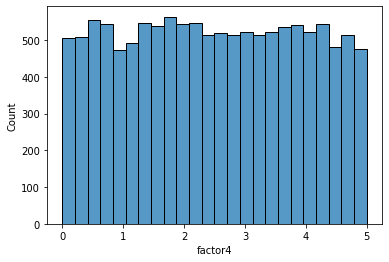

In [ ]:
# pandasのDataFrameであるdfの5列目の最小値、最大値と分布
minmax(df, 4)

◇　Pandasの行や列を取り出すメソッド iloc

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [ ]:
# 最小値以下の値と最大値以上の値を除去する関数
def removeoutliner(list, column, min, max):
    dim = list.shape
    print('        ')
    print('◆ 入力データの次元 {}行 × {}列'.format(dim[0], dim[1]))
    print('        ')    
    print('◇ Outlinerを除去する列: {}'.format(column))
    print('　　　　　Outlinerの下限: {}  上限:  {}'.format(min, max))
    print('        ')        
    vec = list.iloc[:, column]
    leng = len(vec)
    newvec = []
    count = 0
    for i in range(leng):
        if vec[i] == 'NaN':
            newvec.append('NaN')
        elif vec[i] < min:
            count += 1
            newvec.append('NaN')
        elif vec[i] > max:
            count += 1
            newvec.append('NaN')
        else:
            newvec.append(vec[i])
    print('□ 削除した要素の数: {}'.format(count))
    print('                    ')
    pre = np.array(list.iloc[:, :column])
    newvec = np.array([newvec]).T
    post = np.array(list.iloc[:, column+1:])
    newlist = np.concatenate([pre, newvec, post], axis=1)
    return pd.DataFrame(newlist)

In [ ]:
# pandasのDataFrameであるdfの5列目で、1より小さいか 4より大きい値を NaN (not a number)とする
res = removeoutliner(df, 4, 1, 4)
res

        
◆ 入力データの次元 15000行 × 151列
        
◇ Outlinerを除去する列: 4
　　　　　Outlinerの下限: 1  上限:  4
        
□ 削除した要素の数: 4926
                    


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,ID1,NaN,NaN,A,nan,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,NaN,A,0.24388,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.1759301262928386,C,4.365006,A,C,1.650896,...,3.17593,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.5665770940300918,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.2863,NaN,4.652309,1.428877,3.36287
4,ID5,C,Z,NaN,NaN,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.1972279440506792,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,NaN,Z,0.44539,C,NaN,2.824001,...,0.779132,0.49173,NaN,NaN,Z,2.614576,2.299104,2.843733,4.20113,0.097627
14997,ID14998,A,C,Z,1.4072236625307877,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,nan,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


               
◆　最小値と最大値
min: 0.0008651517866962,  max: 4.999756747531086
               
◆ データの分布


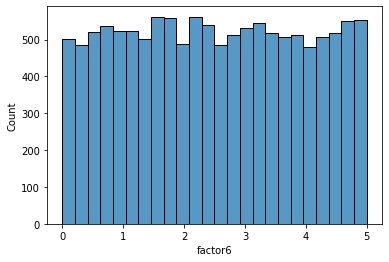

In [ ]:
# pandasのDataFrameであるdfの7列目の最小値、最大値と分布
minmax(df, 6)

In [ ]:
# pandasのDataFrameであるdfの7列目で、1より小さいか 4より大きい値を NaN (not a number)とする
removeoutliner(df, 6, 1, 4)

        
◆ 入力データの次元 15000行 × 151列
        
◇ Outlinerを除去する列: 6
　　　　　Outlinerの下限: 1  上限:  4
        
□ 削除した要素の数: 4968
                    


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863450303276,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,NaN,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.17593,C,NaN,A,C,1.650896,...,3.17593,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.9838108655508204,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.2863,NaN,4.652309,1.428877,3.36287
4,ID5,C,Z,NaN,0.464134,Z,2.191146688612797,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,NaN,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,NaN,C,NaN,2.824001,...,0.779132,0.49173,NaN,NaN,Z,2.614576,2.299104,2.843733,4.20113,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.3600107658302534,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,NaN,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 2) 欠損値の処理

◇ データの読み込み

In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd
import seaborn as sns

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

### 欠損値の表示 (pd.isnull)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [ ]:
# 欠損値の確認
df.isnull()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,False,True,True,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14998,False,True,True,False,True,False,False,True,True,False,...,True,False,False,True,False,False,False,False,False,False


◇ 表示できる行や列の数の変更 (pd.set_option)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#pandas.set_option

In [ ]:
# 全ての行や列の結果を表示する場合
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

◇　行毎の欠損値の個数の表示 (pd.isnull)

In [ ]:
# 欠損値の個数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
factor5      2937
factor6      2486
factor7      3035
factor8      2998
factor9      2489
factor10     2474
factor11     2500
factor12     2476
factor13     2944
factor14     3004
factor15     2535
factor16     2979
factor17     2886
factor18     2455
factor19     2494
factor20     2506
factor21     2978
factor22     2952
factor23     3082
factor24     2989
factor25     2511
factor26     2563
factor27     2944
factor28     3028
factor29     2496
factor30     3008
factor31     2471
factor32     2508
factor33     2513
factor34     2999
factor35     2570
factor36     2940
factor37     2953
factor38     2548
factor39     2988
factor40     2962
factor41     2512
factor42     2994
factor43     2526
factor44     3036
factor45     2518
factor46     2456
factor47     2526
factor48     3007
factor49     2467
factor50     2984
factor51     2428
factor52     3000
factor53     2525
factor54     2931
factor55  

In [ ]:
# 結果を表示を制限する
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### A. 1列ずつ取り出し、平均値や中央値で補完する場合 (pd.fillna)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
# 第5列の取り出し
col4 = df.iloc[:, 4]
col4

0             NaN
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998         NaN
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [ ]:
# データのタイプの確認
type(col4)

pandas.core.series.Series

In [ ]:
#　平均値
mean = col4.mean()
mean

2.4880852839692182

In [ ]:
# 中央値
median = col4.median()
median

2.4742918820579574

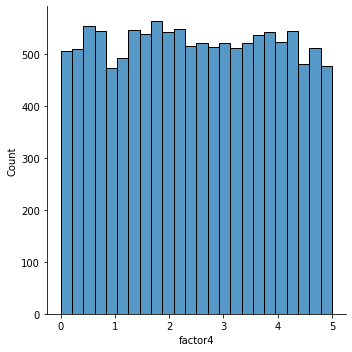

In [ ]:
# 分布
sns.displot(col4)

In [ ]:
# 欠損値を平均値で置き換え
col4av = col4.fillna(col4.mean())
col4av

0        2.488085
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998    2.488085
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [ ]:
# 非数の個数の表示
col4av.isnull().sum()

0

In [ ]:
# 欠損値を中央値で置き換え
col4m = col4.fillna(col4.median())
col4m

0        2.474292
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998    2.474292
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [ ]:
# 非数の個数
col4m.isnull().sum()

0

In [ ]:
# 【参考】　非数を取り除きたいとき
values = col4.dropna()
values

1        0.283582
2        3.175930
3        1.566577
4        0.464134
5        4.096361
           ...   
14993    3.265924
14995    2.197228
14996    4.077054
14997    1.407224
14999    4.072493
Name: factor4, Length: 12544, dtype: float64

### B. 複数の列を一度に補完する場合

In [ ]:
# 各列毎の欠損値の個数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
             ... 
factor146    2470
factor147    2453
factor148    2490
factor149    2520
factor150    2599
Length: 151, dtype: int64

In [ ]:
df.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,...,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,...,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,...,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,...,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,...,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,NaN,0.425597,3.137875,1.291661,A,3.812654,B,B,4.106080,A,A,3.920263,A,NaN,B,3.049662,NaN,2.247368,C,1.323142,...,3.988592,4.676956,NaN,B,0.639870,0.588442,4.106080,B,B,2.190314,3.920263,C,Z,B,NaN,B,3.846921,Z,NaN,B,4.106080,3.081656,B,0.716344,NaN,0.700881,1.815253,3.137875,4.283668,3.739876,A,4.684253,Z,4.852692,Z,0.724870,Z,A,Z,A,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,NaN,4.096361,B,4.791550,NaN,NaN,1.788982,C,C,0.598016,NaN,1.853560,B,0.938373,1.928875,4.299159,B,2.60121

In [ ]:
# factor4は平均値で、factor6は中央値で補完する場合
dfcomp = df.fillna( { 'factor4' : df['factor4'].mean(),  'factor6' : df['factor6'].median() } )

In [ ]:
dfcomp.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,...,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,2.488085,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,...,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,...,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,...,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,...,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,NaN,0.425597,3.137875,1.291661,A,3.812654,B,B,4.106080,A,A,3.920263,A,NaN,B,3.049662,NaN,2.247368,C,1.323142,...,3.988592,4.676956,NaN,B,0.639870,0.588442,4.106080,B,B,2.190314,3.920263,C,Z,B,NaN,B,3.846921,Z,NaN,B,4.106080,3.081656,B,0.716344,NaN,0.700881,1.815253,3.137875,4.283668,3.739876,A,4.684253,Z,4.852692,Z,0.724870,Z,A,Z,A,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,NaN,4.096361,B,4.791550,NaN,NaN,1.788982,C,C,0.598016,NaN,1.853560,B,0.938373,1.928875,4.299159,B,2.

### C. 欠損値の多い行や列を全て削除する場合 (pd.drop)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
# 内容のの表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

In [ ]:
# fator4の列を列ごと削除する
dfdrop = df.drop('factor4', axis = 1)

In [ ]:
dfdrop.head()

,ID,factor1,factor2,factor3,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,

In [ ]:
# 各行毎の欠損数を表示する
df.T.isnull().sum()

0        32
1        36
2        29
3        26
4        23
         ..
14995    27
14996    31
14997    23
14998    28
14999    31
Length: 15000, dtype: int64

In [ ]:
#　1行目と５行目を削除する場合
dfremove = df.drop([0, 4])
dfremove.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,B,4.987059,Z,3.726332,B,3.411700,B,B,1.352076,2.690932,Z,1.876773,1.059391,B,A,4.601694,4.318651,3.127091,NaN,2.284618,A,B,0.834846,3.275162,A,A,4.306125,4.887632,NaN,NaN,NaN,4.438206,A,2.694831,Z,Z,A,NaN,C,C,NaN,Z,2.058104,A,NaN,C,NaN,4.861093,NaN,2.284618,Z,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,N

### D. 欠損値のある行や列を削除する場合 (pd.dropna)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# 内容のの表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

In [ ]:
# 少なくとも一つの欠損値を持つ全ての行を削除する場合
dfremoveall = df.dropna()
dfremoveall
# この場合、欠損値のないレコードはないため、すべてのレコードが削除される

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150


In [ ]:
# 少なくとも一つの欠損値が factor4 にある行を削除する場合 (axisは指定しなくてもdefaultでaxis=0となっている)
dfremovepart = df.dropna(subset = ['factor4'])
dfremovepart

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,B,4.987059,Z,3.726332,B,3.411700,B,B,1.352076,2.690932,Z,1.876773,1.059391,B,A,4.601694,4.318651,3.127091,NaN,2.284618,A,B,0.834846,3.275162,A,A,4.306125,4.887632,NaN,NaN,NaN,4.438206,A,2.694831,Z,Z,A,NaN,C,C,NaN,Z,2.058104,A,NaN,C,NaN,4.861093,NaN,2.284618,Z,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,

In [ ]:
# 各列毎の欠損数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
             ... 
factor146    2470
factor147    2453
factor148    2490
factor149    2520
factor150    2599
Length: 151, dtype: int64

In [ ]:
# 欠損値でない値が12,500以上の列を残す (欠損値が2,500未満の列を残す)
droploss = df.dropna(thresh=12500, axis=1)
droploss

,ID,factor4,factor6,factor9,factor10,factor11,factor12,factor18,factor19,factor29,factor31,factor46,factor49,factor51,factor55,factor65,factor66,factor67,factor83,factor102,factor103,factor106,factor107,factor110,factor117,factor121,factor134,factor142,factor146,factor147,factor148
0,ID1,NaN,1.241863,0.984801,2.469171,1.822291,4.038186,0.903868,2.857458,4.984307,0.001616,2.121655,2.513464,2.295458,1.260032,NaN,1.623454,1.964873,3.100741,1.112267,3.381201,3.858405,4.801806,0.444077,1.260355,3.758708,3.276990,3.965898,NaN,4.951736,1.259221
1,ID2,0.283582,0.243880,2.599852,NaN,4.699768,NaN,3.237537,4.165371,NaN,0.295752,2.934470,2.450915,2.850523,3.715993,0.813558,2.934470,0.976044,2.291703,3.870807,4.863287,1.739113,4.590584,4.342024,3.098601,2.364969,1.052759,1.501172,4.022659,1.036468,0.221097
2,ID3,3.175930,4.365006,1.650896,4.186858,2.469081,3.232988,2.101856,1.216347,4.808219,0.910761,NaN,3.631673,NaN,4.186858,4.425289,2.434897,NaN,1.083943,2.549740,3.896583,NaN,4.931812,0.075712,1.941972,1.543956,3.175933,4.225075,0.651723,4.186858,NaN
3,ID4,1.566577,2.983811,NaN,0.149180,2.524717,4.578371,4.861378,3.919013,NaN,NaN,2.105304,NaN,4.987059,3.411700,4.601694,4.318651,3.127091,2.694831,2.689592,3.368035,4.702451,2.694831,3.726332,0.087589,3.512753,2.105304,2.689592,1.286300,NaN,4.652309
4,ID5,0.464134,2.191147,4.382401,1.090004,NaN,0.082078,1.386880,0.555321,4.072889,0.425597,NaN,1.323142,3.807364,3.807364,0.464134,0.555321,3.321233,0.483867,4.676956,NaN,0.588442,4.106080,2.190314,3.846921,4.106080,4.852692,4.642228,0.708323,0.808047,0.581696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,2.197228,4.384694,NaN,4.738641,2.019546,2.046802,0.815618,NaN,1.848568,NaN,3.835551,3.367056,0.143134,NaN,NaN,3.216287,2.427298,3.367056,2.197228,3.462115,NaN,3.908579,4.925876,3.719722,2.588611,1.902927,2.877683,0.224341,0.143134,2.340001
14996,ID14997,4.077054,0.445390,2.824001,3.497963,NaN,3.049475,3.973854,1.423126,4.551346,2.086606,0.390986,NaN,1.550577,0.018289,1.062223,NaN,0.779132,2.614576,3.049475,3.850616,0.332232,2.271194,2.966605,4.911405,2.749235,3.049475,0.491730,2.614576,2.299104,2.843733
14997,ID14998,1.407224,2.360011,2.511333,4.765450,NaN,2.685202,2.940761,0.893560,1.635755,3.239032,2.822728,2.393820,2.918072,NaN,0.770691,2.469749,2.050180,2.913268,4.739103,0.463616,1.775575,3.060938,NaN,2.454056,4.984215,1.094837,2.511333,NaN,1.562139,4.859076
14998,ID14999,NaN,4.059424,2.878456,2.880888,0.677698,NaN,4.666555,NaN,3.175944,4.666555,0.632858,0.677698,4.010128,2.876433,4.593942,0.193589,3.397636,NaN,4.059424,4.444863,0.101104,2.228709,3.793903,1.130751,2.540646,2.645302,4.732487,4.666555,2.699051,1.314517


### E. 任意の配列の n 列を中央値で置き換える

In [ ]:
# pandasの配列 list の n 列を中央値で置き換える関数 (列の番号は 0 から数える　　　n = 0, 1, 2, ...)
def interploate(list, n):
    # listはpandasのDateFrame, n列は数値が入力された列
    import pandas as pd
    col = list.iloc[:, n]
    col2 = pd.DataFrame(col.fillna(col.median()))
    pre = list.iloc[:, :n]
    post = list.iloc[:, n+1:]
    newlist = pd.concat([pre, col2, post], axis=1)
    return newlist

In [ ]:
res = interploate(df, 4)
res

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,2.474292,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,

In [ ]:
res.iloc[:, 4].isnull().sum()

0

## 3) カテゴリカル変数のEncoding

◇ データの読み込み

In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

### A. One-Hot Encoding

ある列が、例えば、A, B, C, Z　という文字で入力されている場合、それぞれの文字一つに対して新しい列を一つ作り、各列において、例えば A が入力されていれば 1、それ以外は 0 とする。

In [ ]:
# データの表示
df

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

◇ factor1の列を、One-Hot Encodingしてみる。

In [ ]:
# カテゴリカルデータが入力された列の抽出
df_cat = df.select_dtypes(include='object')
df_cat
# 数値データが入力された列を抽出する場合は、include = 'number' とする。

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


In [ ]:
# column名がfactor1の列の抽出
factor1 = df_cat.iloc[:, 1]
factor1

0        NaN
1          C
2          A
3          A
4          C
        ... 
14995      B
14996      A
14997      A
14998    NaN
14999      A
Name: factor1, Length: 15000, dtype: object

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [ ]:
# factor1にどの様な文字があるかの確認
factor1.unique()

array([nan, 'C', 'A', 'Z', 'B'], dtype=object)

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
# get_dummiesメサッドによる One Hot Encoding
factor1OH = pd.get_dummies(factor1)
factor1OH

,A,B,C,Z
0,0,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
14995,0,1,0,0
14996,1,0,0,0
14997,1,0,0,0
14998,0,0,0,0


In [ ]:
# IDの列の削除
df_cat2 = df_cat.iloc[:, 1:]

# 全ての列のOne Hot Encoding
df_catOH = pd.get_dummies(df_cat2)
df_catOH

,factor1_A,factor1_B,factor1_C,factor1_Z,factor2_A,factor2_B,factor2_C,factor2_Z,factor3_A,factor3_B,...,factor140_C,factor140_Z,factor143_A,factor143_B,factor143_C,factor143_Z,factor145_A,factor145_B,factor145_C,factor145_Z
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
14996,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14997,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# One Hot Encodingの結果を出力して確認へ
df_catOH.to_csv('drive/MyDrive/Telakoya/result/df_catOH.csv')
# これをdownloadして、自身のPC上で開く。

### B. Label Encodgin

文字が入力された列の一つ一つの文字に対し、A --> 0,  B --> 1, C --> 2, ... などと数字を当てはめてゆく。

In [ ]:
# カテゴリカルデータが入力された列の抽出
df_cat = df.select_dtypes(include='object')
df_cat

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


In [ ]:
# カテゴリカルデータのカラム名(説明変数の名称)を取得
names = df_cat.columns
names

Index(['ID', 'factor1', 'factor2', 'factor3', 'factor5', 'factor7', 'factor8',
       'factor13', 'factor14', 'factor16', 'factor17', 'factor21', 'factor22',
       'factor23', 'factor24', 'factor27', 'factor28', 'factor30', 'factor34',
       'factor36', 'factor37', 'factor39', 'factor40', 'factor42', 'factor44',
       'factor48', 'factor50', 'factor52', 'factor54', 'factor56', 'factor57',
       'factor60', 'factor63', 'factor64', 'factor70', 'factor71', 'factor74',
       'factor75', 'factor78', 'factor80', 'factor82', 'factor84', 'factor85',
       'factor86', 'factor87', 'factor88', 'factor89', 'factor90', 'factor91',
       'factor93', 'factor95', 'factor96', 'factor98', 'factor100',
       'factor104', 'factor108', 'factor109', 'factor112', 'factor113',
       'factor114', 'factor115', 'factor116', 'factor118', 'factor119',
       'factor120', 'factor123', 'factor125', 'factor131', 'factor133',
       'factor135', 'factor137', 'factor138', 'factor139', 'factor140',
       'fact

◇ 次に、これらの列の文字を数字に変換してゆく。それにはSci-kit learnのLabelEncoderを利用する。

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

◆ factor1 という１列のみ Label Encodingする場合

In [ ]:
# 1. プログラムの読み込み
from sklearn.preprocessing import LabelEncoder
# 2. 関数の宣言 (インスタンス化)
le = LabelEncoder()
# 3. factor1の列をLabel Encoding
le.fit(df_cat['factor1'])

LabelEncoder()

In [ ]:
# どの様な文字があったかの確認
le.classes_

array(['A', 'B', 'C', 'Z', nan], dtype=object)

In [ ]:
# 文字を数字に変換した結果の確認
res = le.transform(df_cat['factor1'])
res

array([4, 2, 0, ..., 0, 4, 0])

In [ ]:
#　元の式に代入
df_cat['factor1'] = res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 代入した結果の確認
df_cat['factor1']

0        4
1        2
2        0
3        0
4        2
        ..
14995    1
14996    0
14997    0
14998    4
14999    0
Name: factor1, Length: 15000, dtype: int64

◆ 配列(行列からなるデータ)の文字が入力された全ての列を Label Encoding する場合

In [ ]:
# 元のデータの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
# カテゴリカルデータが入力された列を取り出す  (include='number'とすると数の列のみが選ばれる)
df_cat = df.select_dtypes(include='object')
df_cat

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


◇　文字列を Label Encoding する関数

In [ ]:
# ある配列の全ての列を Label Encodingする関数を定義する　(数字の列がある場意は除去される)
# ただし、先頭の列をIDの列と仮定し、最初の列はそのままにしておくとする。
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def labelencode(dataframe):
    df_cat = dataframe.select_dtypes(include='object')
    names = df_cat.columns
    # 次の操作で先頭行のencodingを除外している。この行を削除すると全ての列がencodingされる。
    names = names[1:]

    for label in names:
        le = LabelEncoder()
        le.fit(df_cat[label])
        df_cat[label] = le.transform(df_cat[label])

    return df_cat

In [ ]:
# Label Encodingの実行
result = labelencode(df)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,4,4,0,4,1,4,3,4,3,...,2,4,3,4,0,2,4,1,2,0
1,ID2,2,3,3,0,3,0,4,4,4,...,4,2,0,2,3,2,4,4,3,0
2,ID3,0,0,2,2,0,2,3,1,3,...,4,4,3,3,0,0,2,3,2,3
3,ID4,0,3,0,0,2,3,4,4,2,...,3,4,3,3,0,4,1,1,1,2
4,ID5,2,3,4,3,4,1,0,2,1,...,4,0,3,3,3,0,3,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,1,3,4,4,2,0,1,3,1,...,0,4,0,2,1,1,2,1,1,4
14996,ID14997,0,2,0,3,2,4,1,0,4,...,4,0,1,0,2,1,4,1,4,3
14997,ID14998,0,2,3,1,1,0,0,0,0,...,4,1,2,4,0,1,4,2,3,1
14998,ID14999,4,4,3,0,4,4,2,1,4,...,1,2,1,3,2,1,3,0,1,1


In [ ]:
# 結果の出力
result.to_csv('drive/MyDrive/Telakoya/result/labelencoded.csv')

## 4) 複数シートの突合(concat)

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

### A. 突合する横に長いデータの突合

◇ データの読み込み

In [ ]:
# 横に長い複数シートを持つExcelを全て読み込む。sheet_name = Noneとする (2min)
dfC = pd.read_excel('drive/MyDrive/Telakoya/data/columndataM.xlsx', sheet_name = None)

In [ ]:
# 辞書形式のデータのkeyを確認する
dfC.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 個々のシートをひとつずつ取り出す
dfC1 = dfC['Sheet1']
dfC2 = dfC['Sheet2']
dfC3 = dfC['Sheet3']
dfC4 = dfC['Sheet4']

In [ ]:
# 各シートの行と列の数
dfC1.shape

(150, 15001)

◆ 行方向(縦方向)に突合する (axis = 0)

In [ ]:
# 縦方向に突合 (axisのdefaultは0) (45秒)
dfCall = pd.concat([dfC1, dfC2, dfC3, dfC4])

In [ ]:
dfCall.shape

(600, 15001)

In [ ]:
# 突合結果の書き出し (1分)
dfCall.to_csv('drive/MyDrive/Telakoya/result/dfCall.csv')

### B. 突合する縦に長いデータの突合

◇ データの読み込み

In [ ]:
# 縦に長い複数シートを持つExcelを全て読み込む。sheet_name = Noneとする (1min)
dfR = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = None)

In [ ]:
dfR.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 個々のシートをひとつずつ取り出す
dfR1 = dfR['Sheet1']
dfR2 = dfR['Sheet2']
dfR3 = dfR['Sheet3']
dfR4 = dfR['Sheet4']

In [ ]:
#　各シートの行と列の数
dfR1.shape

(15000, 151)

In [ ]:
dfR1

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,B,3.817593,NaN,B,0.537500,B,3.758930,1.295609,A,...,Z,Z,C,NaN,3.925446,NaN,1.336258,C,C,B
1,ID2,B,0.023699,4.996555,NaN,0.340014,B,3.893427,4.232260,Z,...,A,Z,NaN,NaN,NaN,2.679516,NaN,B,C,C
2,ID3,Z,4.921750,NaN,B,4.710665,B,1.791306,2.060678,NaN,...,A,A,C,NaN,3.060463,4.693045,4.633052,A,NaN,Z
3,ID4,A,2.274899,1.621349,Z,2.229030,C,3.301864,4.440475,Z,...,C,NaN,C,B,1.104209,4.429906,4.025086,C,A,Z
4,ID5,A,NaN,1.995605,A,1.517333,C,NaN,0.864784,B,...,NaN,NaN,A,NaN,4.028904,1.808924,0.005696,C,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
14996,ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
14997,ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
14998,ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN


◇ 1列目をindex(各列の名称)とし、1列目は削除する

In [ ]:
# indexを1列目のIDに変える関数
def changer(mat):
    body = mat.iloc[:, 1:]
    index = dict(mat.iloc[:, 0])
    return body.rename(index = index)

In [ ]:
dfR1 = changer(dfR1)
dfR2 = changer(dfR2)
dfR3 = changer(dfR3)
dfR4 = changer(dfR4)

In [ ]:
dfR1.shape

(15000, 150)

In [ ]:
dfR1

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
ID1,B,3.817593,NaN,B,0.537500,B,3.758930,1.295609,A,2.754218,...,Z,Z,C,NaN,3.925446,NaN,1.336258,C,C,B
ID2,B,0.023699,4.996555,NaN,0.340014,B,3.893427,4.232260,Z,1.863195,...,A,Z,NaN,NaN,NaN,2.679516,NaN,B,C,C
ID3,Z,4.921750,NaN,B,4.710665,B,1.791306,2.060678,NaN,3.293334,...,A,A,C,NaN,3.060463,4.693045,4.633052,A,NaN,Z
ID4,A,2.274899,1.621349,Z,2.229030,C,3.301864,4.440475,Z,4.231857,...,C,NaN,C,B,1.104209,4.429906,4.025086,C,A,Z
ID5,A,NaN,1.995605,A,1.517333,C,NaN,0.864784,B,4.417359,...,NaN,NaN,A,NaN,4.028904,1.808924,0.005696,C,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,1.017615,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,NaN,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,3.998039,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,0.746506,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN


◆ 列方向(横方向)に突合する (axis = 1)

In [ ]:
# 横方向に突合 (axis = 1)
dfRall = pd.concat([dfR1, dfR2, dfR3, dfR4], axis = 1)

In [ ]:
dfRall.shape

(15000, 600)

In [ ]:
# 突合した結果の書き出し
dfRall.to_csv('drive/MyDrive/Telakoya/result/dfRall.csv')